### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [30]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [31]:
#1
data = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
data.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [32]:
#2
data.info()
#conclusion
print('Data ini terdiri dari 10 kolom dengan total data sebanyak 6194')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
Data ini terdiri dari 10 kolom dengan total data sebanyak 6194


3. display the number of each unique value in the race and admission columns

*   List item
*   List item

(including NaN)

In [33]:
#3a
admission = data['admission'].value_counts(dropna=False)
print(admission)


admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [34]:
#3b
race = data['race'].value_counts(dropna=False)
print(race)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [35]:
#4
data['admission'].fillna('Deny', inplace=True)
data['race'].fillna('Other', inplace=True)


<ipython-input-35-96364619aaa9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['admission'].fillna('Deny', inplace=True)
<ipython-input-35-96364619aaa9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [36]:
#5
data.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop [application_id](https://) column

In [37]:
# 6
data = data.drop('application_id', axis=1)

7. show describe column and conclude what the insight is from that column

In [38]:
#7
data.describe()
print('gpa, gmat, work_exp memiliki total data sebanyak 6194. dengan rata2 gpa 3.2, gmat 651.09, work_exp 5.01. minimum gpa 2.65, gmat 570, dan work_exp 1. maximum gpa 3.77, gmat 780, dan work_exp 9')
#conclusion


gpa, gmat, work_exp memiliki total data sebanyak 6194. dengan rata2 gpa 3.2, gmat 651.09, work_exp 5.01. minimum gpa 2.65, gmat 570, dan work_exp 1. maximum gpa 3.77, gmat 780, dan work_exp 9


8. make a visualization to analyze admission status based on major and explain the conclusions

Pendaftar dengan major humanities memiliki status deny dan admit terbanyak. Pendaftar dengan major business memiliki status waitlist dan deny paling rendah. Pendaftar dengan major STEM memiliki status deny paling rendah


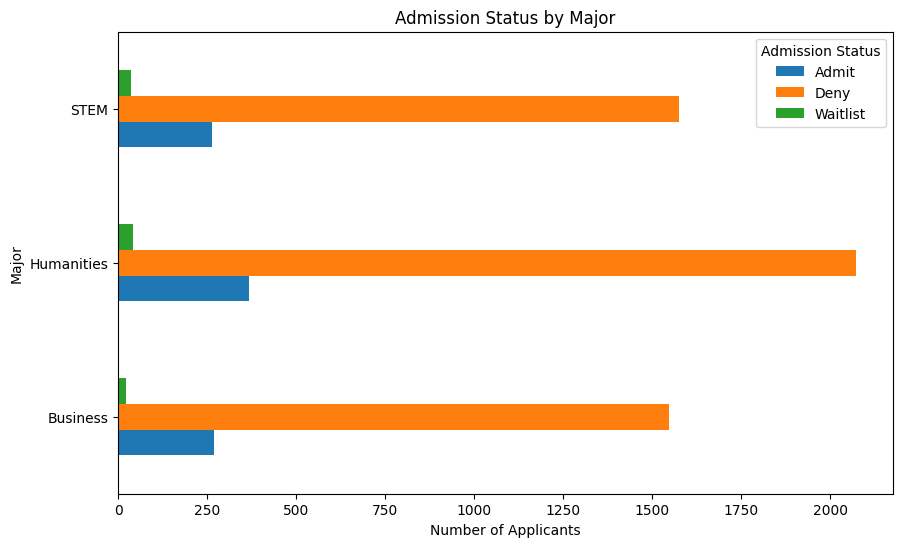

In [39]:
#8
barMajor = data.groupby(['major',
'admission'])['admission'].count().unstack()
barMajor.plot (kind='barh',
figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')

print('Pendaftar dengan major humanities memiliki status deny dan admit terbanyak. Pendaftar dengan major business memiliki status waitlist dan deny paling rendah. Pendaftar dengan major STEM memiliki status deny paling rendah')

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

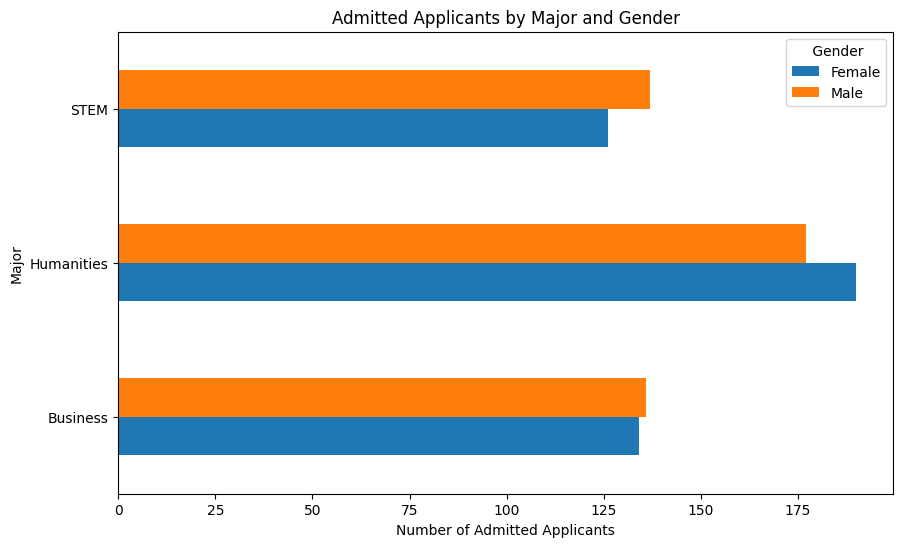

Pendaftar laki-laki dan perempuan kebanyakan berasal dari major humanities. Pendaftar perempuan dengan major STEM paling sedikit


In [40]:
#9
admitted_df = data[data['admission'] == 'Admit']
count_major_by_gender = admitted_df.groupby(['major',
'gender']) ['gender'].count().unstack()
count_major_by_gender.plot (kind='barh', figsize=(10,6))
plt.title( 'Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel( 'Major')
plt.legend(title= ' Gender')
plt.show()

print('Pendaftar laki-laki dan perempuan kebanyakan berasal dari major humanities. Pendaftar perempuan dengan major STEM paling sedikit')

10. create your own insightful visualization and explain it in at least 2 sentences

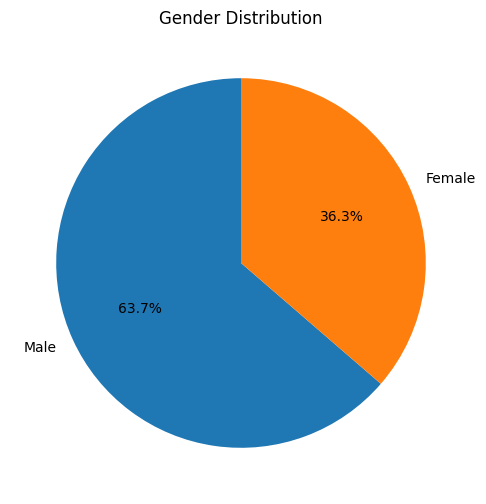

Sebanyak 63.7% pendaftar adalah laki-laki. Sedangkan jumlah perempuan hanya 36.3% dari total 6194 data.


In [41]:
#10
gender_counts = data['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))  # Set figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Gender Distribution')

# Display the pie chart
plt.show()

print('Sebanyak 63.7% pendaftar adalah laki-laki. Sedangkan jumlah perempuan hanya 36.3% dari total 6194 data.')

11. create your own insightful visualization and explain it in at least 2 sentences

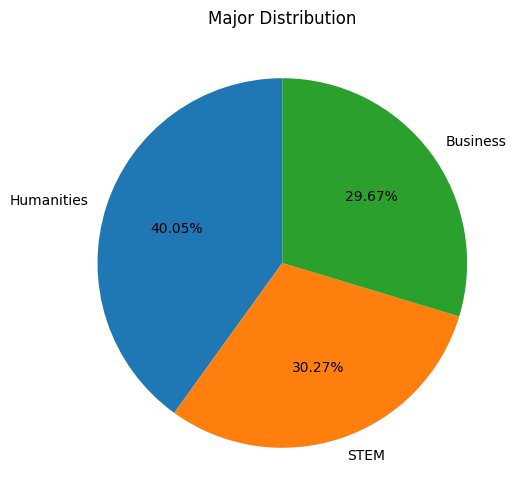

Pendaftar terbanyak berasal dari major Humanities yaitu sebanyak 40.05%. Pendafatar yang berasal dari major business ada sebanyak 29.67% dan dari STEM sebesar 30.27%


In [42]:
#11
gender_counts = data['major'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))  # Set figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', startangle=90)

# Add a title
plt.title('Major Distribution')

# Display the pie chart
plt.show()

print('Pendaftar terbanyak berasal dari major Humanities yaitu sebanyak 40.05%. Pendafatar yang berasal dari major business ada sebanyak 29.67% dan dari STEM sebesar 30.27%')

12. encode categorical columns and display the results

In [43]:
#12a
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['international'] = label_encoder.fit_transform(data['international'])
data['major'] = label_encoder.fit_transform(data['major'])
data['race'] = label_encoder.fit_transform(data['race'])
data['work_industry'] = label_encoder.fit_transform(data['work_industry'])

data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [44]:
#12b
#encode y

data['admission'] = label_encoder.fit_transform(data['admission'])
data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

> Add blockquote



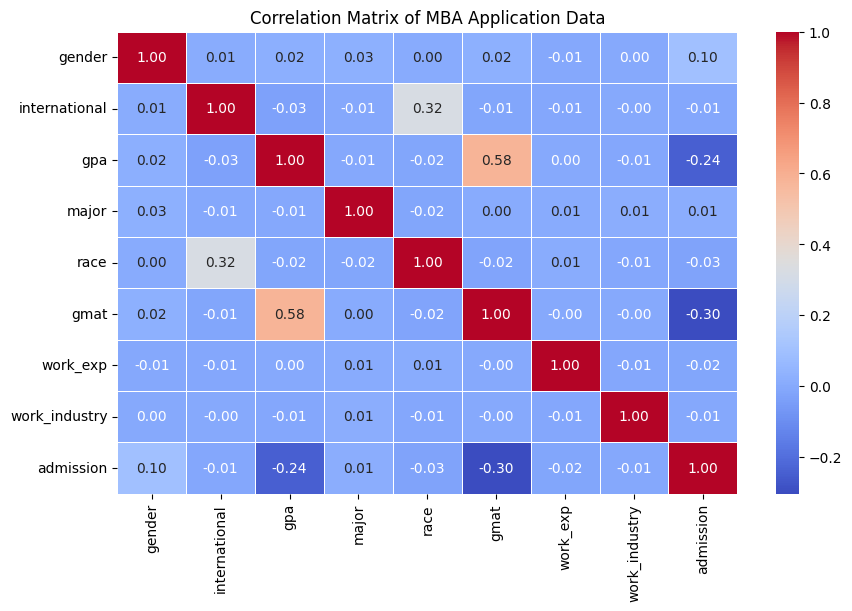

In [45]:
#13
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of MBA Application Data')

plt.show()

#Conclusion
# GMAT dan GPA memiliki kolerasi positif yang kuat. Ini mengindikasikan bahwa GMAT dan GPA merupakan indikator kinerja akademik.
# GMAT and Admission memiliki korelasi negatif, GPA dan Admission juga memiliki korelasi negatif. Ini mengindikasikan bahwa GMAT berpengaruh terhadap penerimaan atau tidaknya si pendaftar.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [46]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = data['admission']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

# Predict the role for the given character
average_gpa = data['gpa'].mean()

lisa = {
    'gender': 0,
    'international': 0,
    'gpa': average_gpa,
    'major': 0,
    'race': 0,
    'gmat': 580,
    'work_exp': 2.0,
    'work_industry':3
}
lisa_df = pd.DataFrame([lisa])

predicted_role_encoded = clf.predict(lisa_df)

# Get the predicted role (dicoding)
predicted = label_encoder.inverse_transform(predicted_role_encoded)

print("Prediction of Lisa's application: ", predicted[0])

Accuracy of the model: 0.7941888619854721
Prediction of Lisa's application:  Deny
